In [1]:
pip install scikit-learn pandas numpy matplotlib seaborn joblib


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np # linear algebra
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\housing.csv")

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

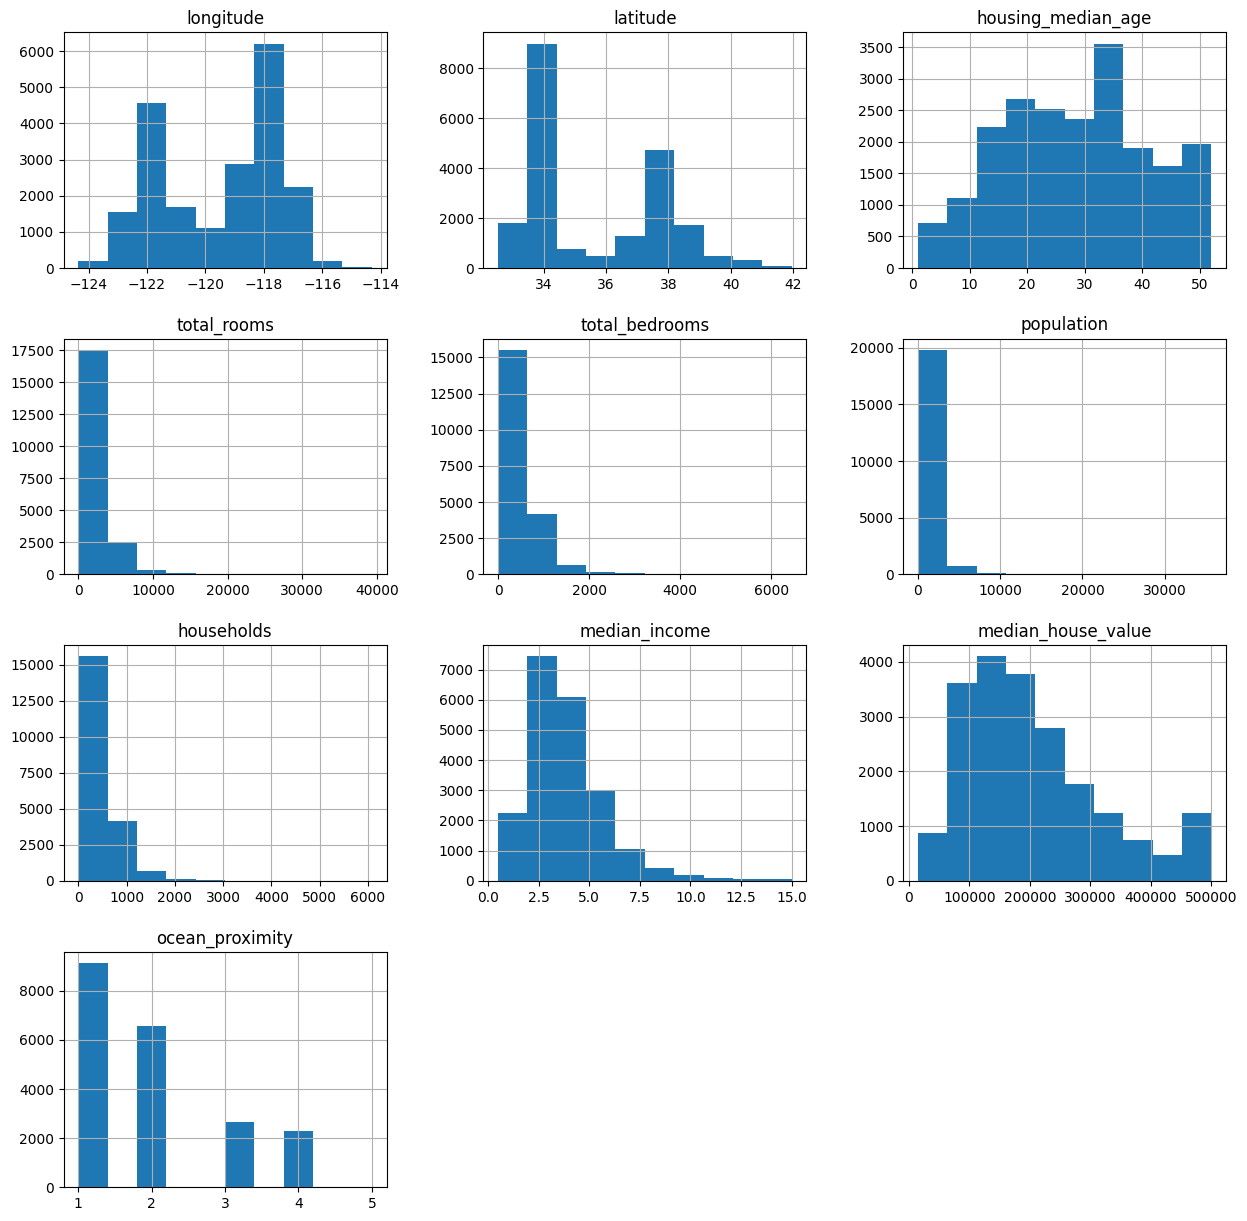

In [16]:
df.hist(figsize=(15, 15))

<Axes: >

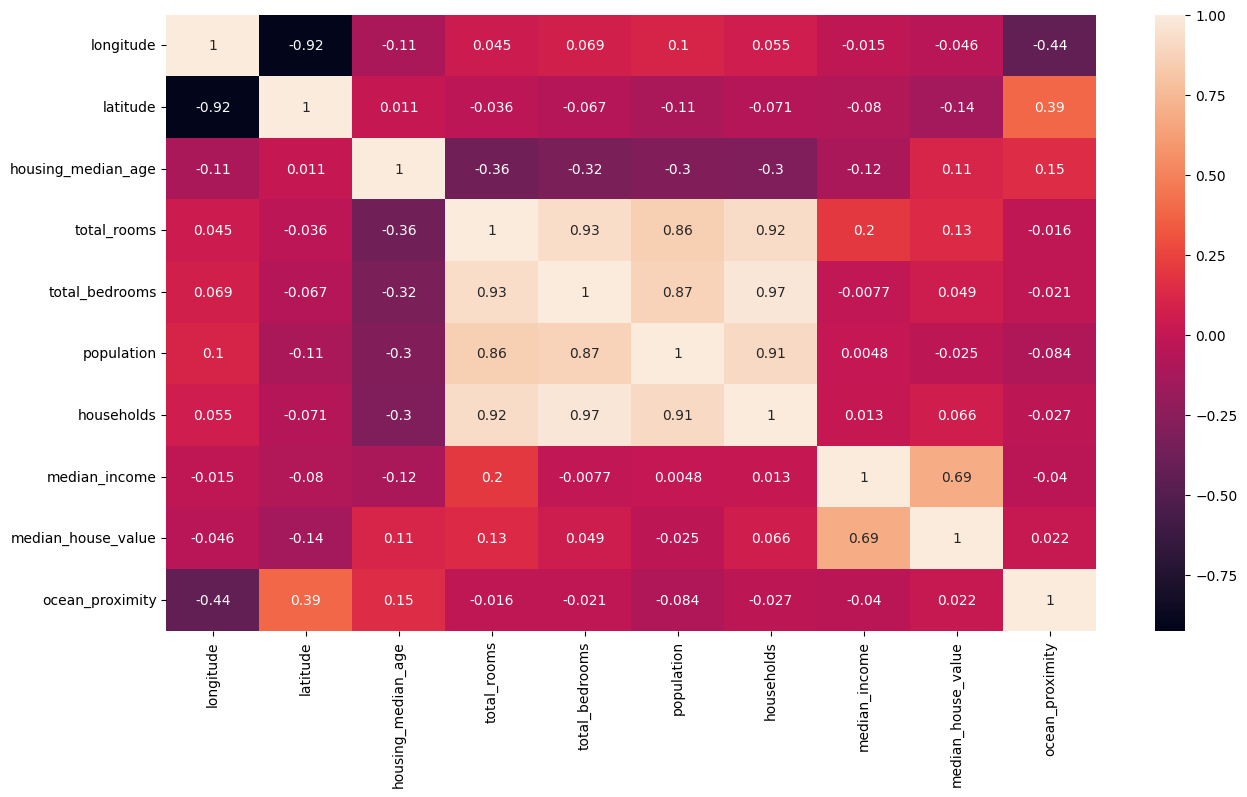

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

In [18]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.6373833667145294
Testing Score:  0.6281544403553245
RMSE:  69838.844191827


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit


In [23]:
# Explore the column ocean_proximity
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
1    9136
2    6551
3    2658
4    2290
5       5
Name: count, dtype: int64

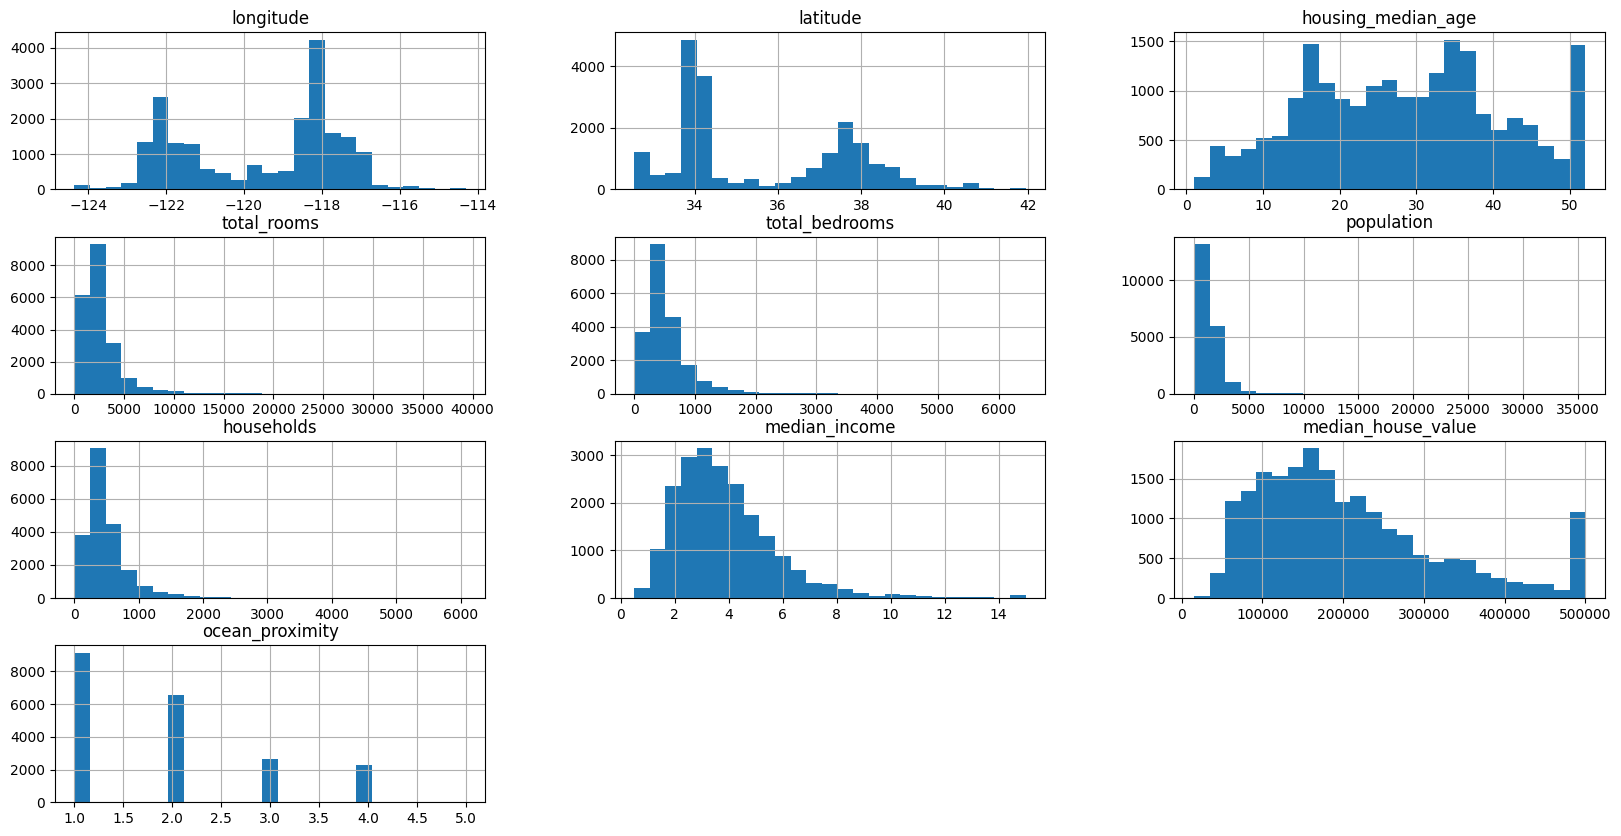

In [25]:
# Histogram
df.hist(bins=25,figsize=(20,10));

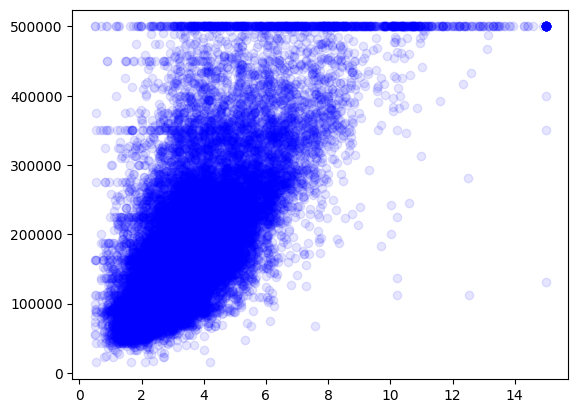

In [28]:
# check scatter plot between median_income and median_house_value
plt.scatter(df["median_income"],df["median_house_value"], alpha=0.1,color="b")

In [30]:
# median_income into bins
income_bins = pd.cut(df["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])

<Axes: xlabel='median_income', ylabel='count'>

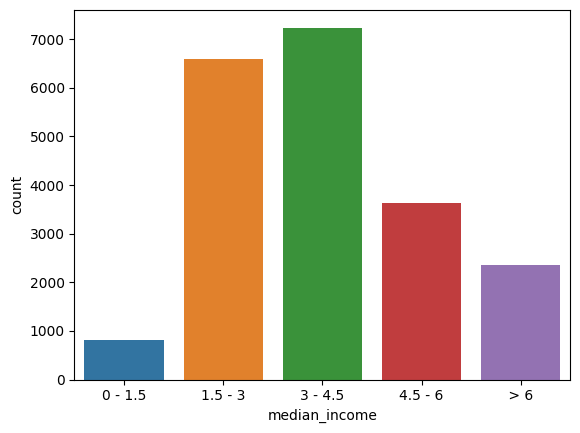

In [31]:
sns.countplot(x = income_bins)

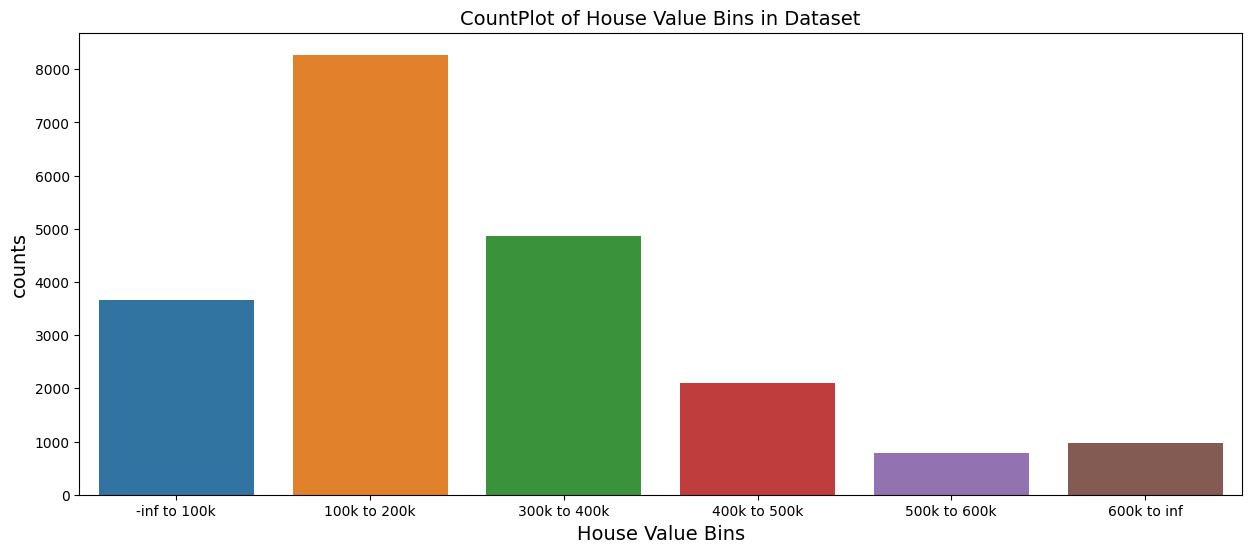

In [33]:
house_value_bins = pd.cut(x=df["median_house_value"],
                          bins=(-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf),
                                labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k to inf') )
## countpLot for the above chunks 
plt.figure(figsize=(15,6)) 
sns.countplot(x=house_value_bins) 
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k') 
plt.xlabel('House Value Bins', fontsize=14, c='k') 
plt.ylabel('counts', fontsize=14,c='k') 
plt.show() 

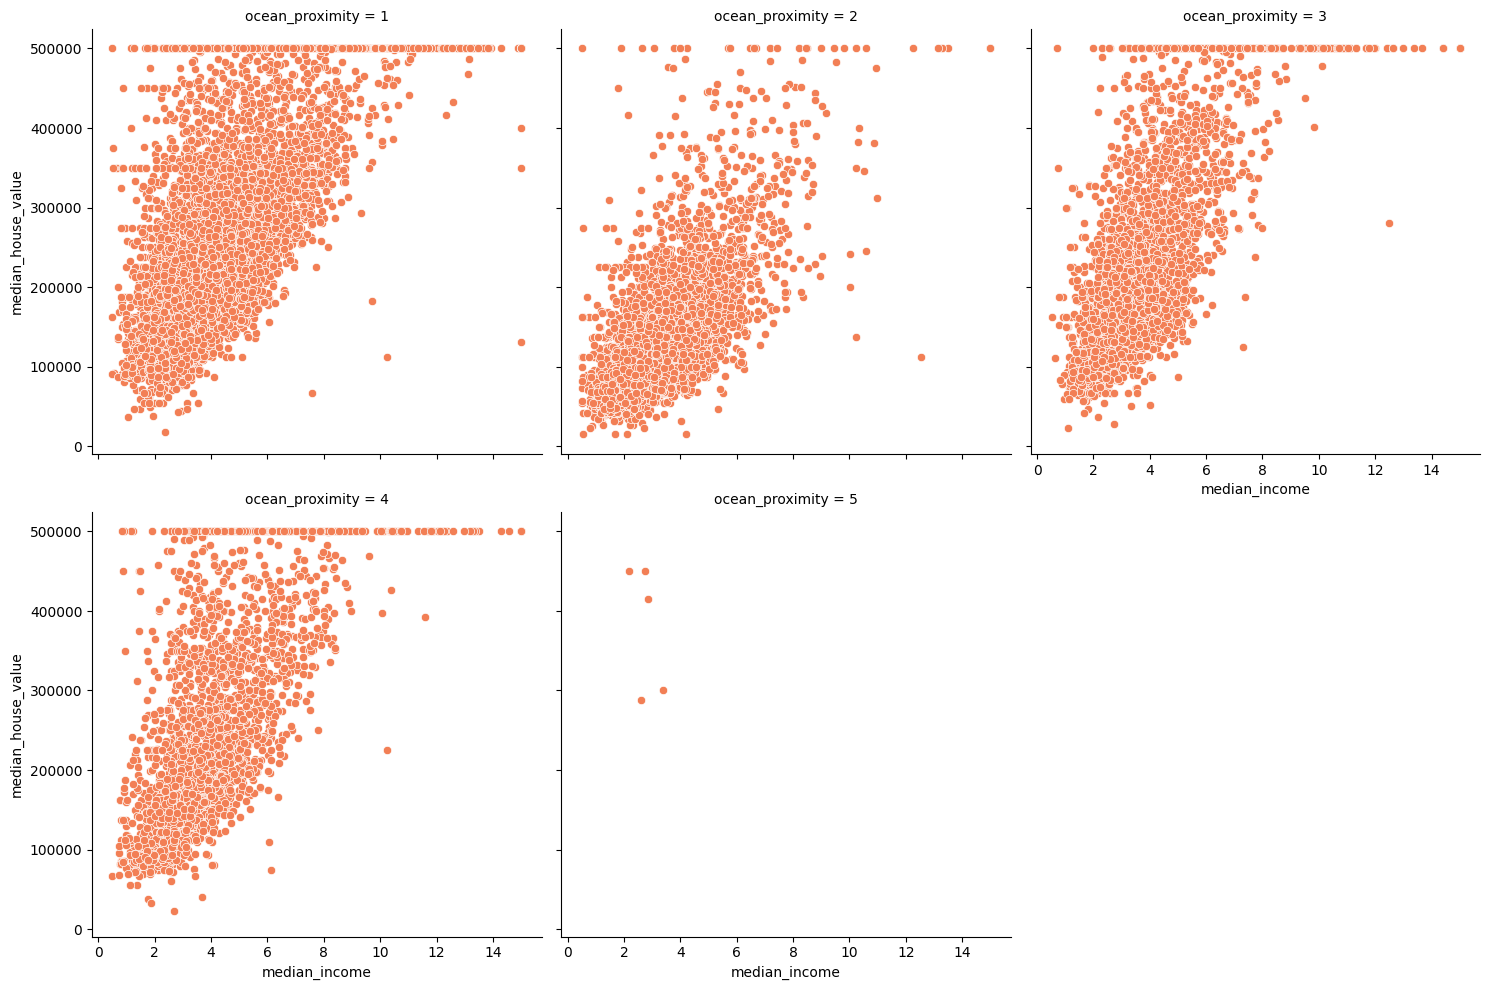

In [35]:
# Scatter plot between median_income and median_house_value at each ocean_proximity
sns.relplot(x="median_income",y='median_house_value',data=df,col="ocean_proximity",col_wrap=3,color="#F27F55")

In [36]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [37]:
house = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

In [38]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
x = house.drop(["median_house_value"],axis=1).values
y= house['median_house_value'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [41]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [42]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(x_train,y_train)

0.5667854218731496

In [44]:
reg.score(x_test,y_test)

0.5579094295733918

In [45]:
reg.intercept_

189500.73217968308

In [46]:
reg.coef_

array([ 35759.92470295, -34037.21053083,  37183.31948873, -33085.36983655,
        39590.23692124, 104914.43560768,    229.78451159])

In [47]:
pd.DataFrame(reg.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35759.924703
total_rooms,-34037.210531
total_bedrooms,37183.319489
population,-33085.369837
households,39590.236921
median_income,104914.435608
median_house_value,229.784512


In [48]:
y_pred_1 = reg.predict(x_test)

In [49]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [50]:
df_1.head()

,y_test,Y_pred
0,47700.0,102485.316899
1,45800.0,145576.239187
2,500001.0,271690.151765
3,218600.0,258539.307042
4,278000.0,221919.963739


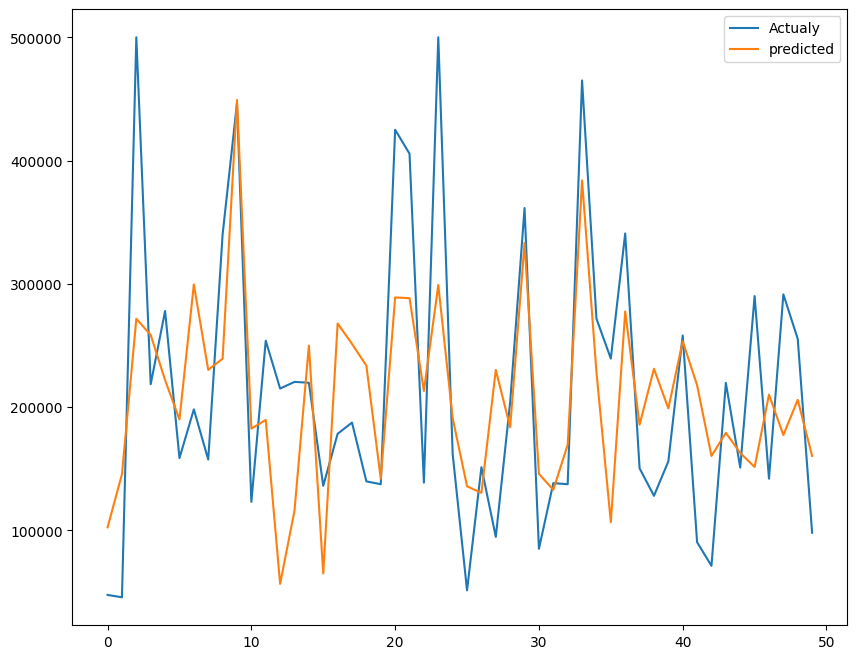

In [52]:
# Linera regression Model
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);

In [53]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [54]:
rid.score(x_train,y_train)

0.5667853981121558

In [55]:
rid.score(x_test,y_test)

0.5579243835773751

In [56]:
rid.coef_

array([ 35755.56512768, -34000.59374245,  37150.53466219, -33077.35776555,
        39576.59208361, 104895.08923215,    229.8725632 ])

In [57]:
rid.coef_

array([ 35755.56512768, -34000.59374245,  37150.53466219, -33077.35776555,
        39576.59208361, 104895.08923215,    229.8725632 ])

In [58]:
pd.DataFrame(rid.coef_,house.columns[:-1],columns=['coeficients'])

,coeficients
housing_median_age,35755.565128
total_rooms,-34000.593742
total_bedrooms,37150.534662
population,-33077.357766
households,39576.592084
median_income,104895.089232
median_house_value,229.872563


In [59]:
y_pred_2 = rid.predict(x_test)

In [60]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [61]:
df_2.head()

,y_test,Y_pred
0,47700.0,102486.347813
1,45800.0,145592.181400
2,500001.0,271693.874549
3,218600.0,258536.811422
4,278000.0,221913.646969


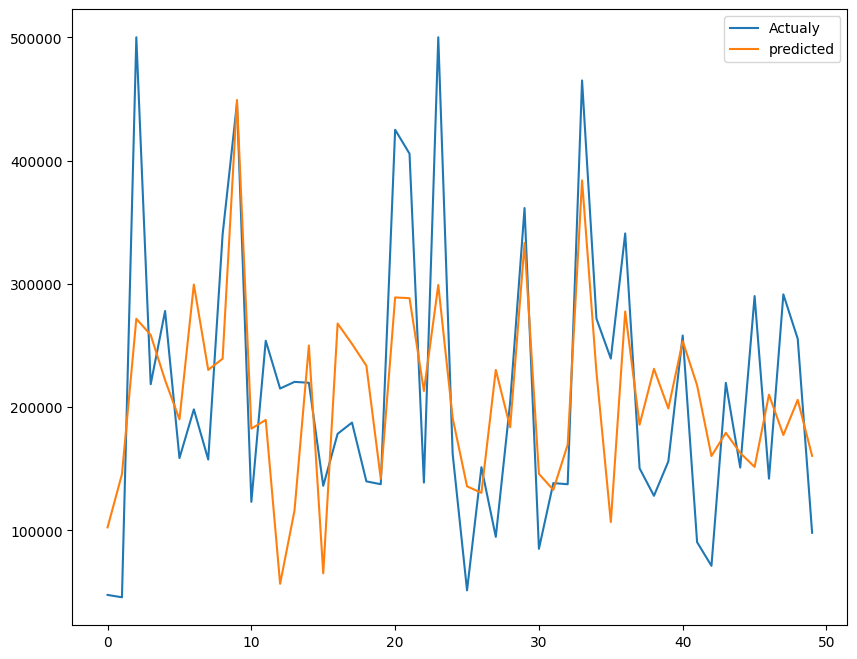

In [62]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actualy","predicted"]);

In [63]:
# Evaluation of Models (Linear Regression)
from sklearn.metrics import r2_score

In [64]:
reg_score = r2_score(y_test,y_pred_1)

In [65]:
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.5577094144497501

In [66]:
adj_r2 < reg_score

True

In [67]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [68]:
mse = mean_squared_error(y_test , y_pred_1)
mse

5849822467.998552

In [69]:
mae = mean_absolute_error(y_test , y_pred_1)
mae

56454.33804537053

In [70]:
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.3519262746096154

In [71]:
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

76484.13213208706

In [72]:
# Evaluation of Models (Linear Regression)
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.5579243835773751

In [73]:
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.5577243752193762

In [74]:
adj_r2 < rid_score

True

In [75]:
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

5849624593.910438

In [76]:
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

56454.93040912284

In [77]:
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.3519433900274027

In [78]:
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

76484.13213208706

In [79]:
#Comapring Both Modet (Linear and Ridge)
models = ["Linear","Ridge"]
data = [[reg_score,reg_mse],[rid_score,rid_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Ridge,0.557924,5.849625e+09
Linear,0.557909,5.849822e+09
